# AnalisisSondaLangmuir.ipynb

Herramienta de análisis computacional del plasma a base de datos experimentales tomados por una Sonda de Langmuir.


## Instrucciones de ejecución: Análisis básico

1. Cargar todas las librerías y funciones.
2. Ejecutar PreProcesado() y Graf_Datos().
3. Calcular el voltaje flotante Vf con Calc_Vf().
4. Calcular la corriente de saturación iónica Iis con Calc_Iis().
5. Calcular el voltaje del plasma Vp por el método de la Segunda Derivada con Calc_Vp_SD().
6. Calcular el voltaje del plasma Vp por el método de la Intersección de Rectas con Calc_Vp_Rectas().
7. Calcular la temperatura electrónica TeV, la corriente de saturación electrónica Ies y la densidad electrónica ne con Calc_TeV_Ies_ne(). Este cálculo de Ies se basa en obtener la imagen más cercana al Vp dado.
8. Calcular el voltaje del plasma Vp por el método Teórico con Calc_Vp_Teorico().
9. Realizar la comparación entre los voltajes del plasma con Comparacion_Vp(), en esta función se mencionan las restricciones principales.
10. Si van a analizarse varios archivos, correr al final Exportar_Resultados_CSV() para almacenar las listas
11. Para obtener los promedios entre archivos en el tiempo, correr Promedios_Temporales_Entre_Archivos() y Graf_Promedios_Temporales_Entre_Archivos()
12. Para obtener los promedios entre archivos en la posición radial, correr Promedios_Espaciales_Entre_Archivos() y Graf_Promedios_Espaciales_Entre_Archivos()

In [1]:
# Cargar las librerías necesarias

import importlib

import calculos as calc
importlib.reload(calc)
import fileio
importlib.reload(fileio)
import graf
importlib.reload(graf)

<module 'graf' from 'c:\\Users\\pelot\\OneDrive\\Documentos\\TEC\\Teoria_de_Plasmas\\repositorio\\sonda-de-langmuir\\Sonda_Lagmuir_Julian\\graf.py'>

In [2]:
import numpy as np
radio = 36.97/(2*np.pi)
print(radio*2)

print((11.7679*1.6/15.1)*10**-2)

11.767916492214741
0.012469298013245034


Zona de pruebas: Solamente para invocar las funciones previas

In [20]:
freq_datos = 40
dif = 0.0009
df, segmentos_df = fileio.PreProcesado("PruebasSondaSimple_174.xlsx", dif, freq_datos,-80,80)

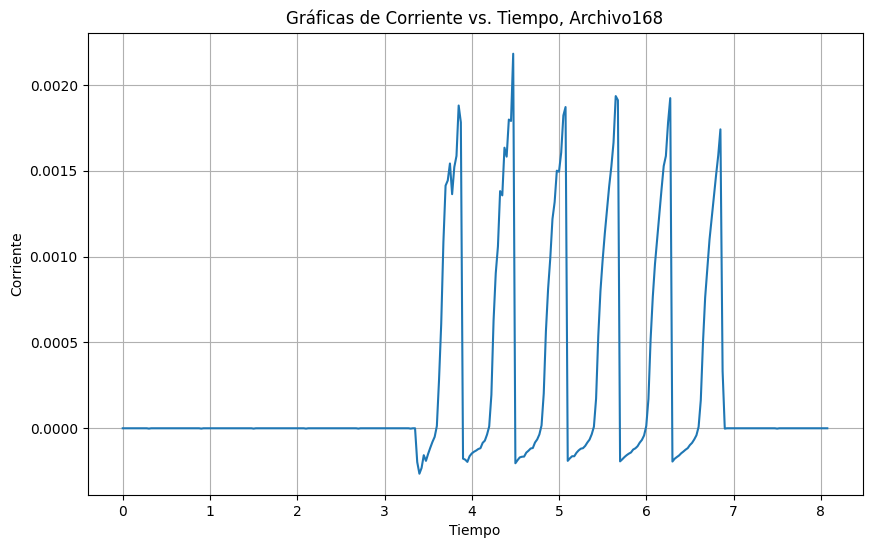

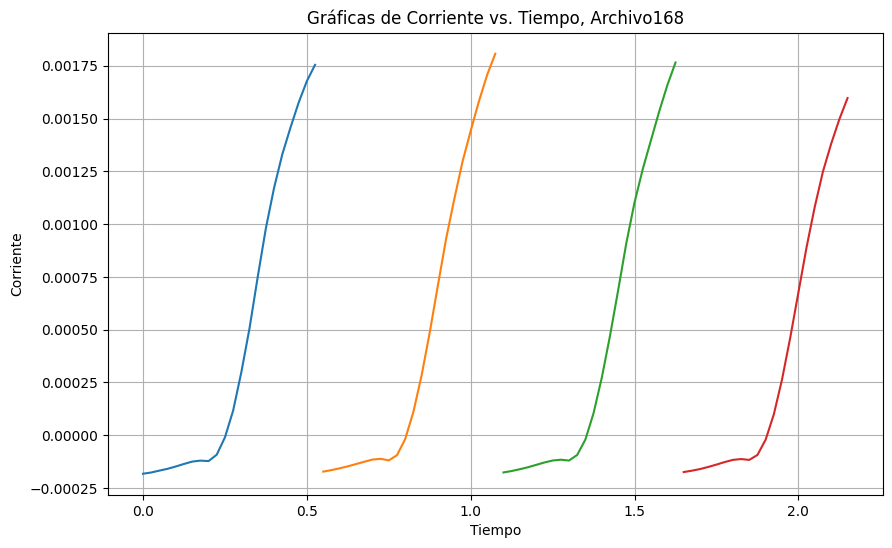

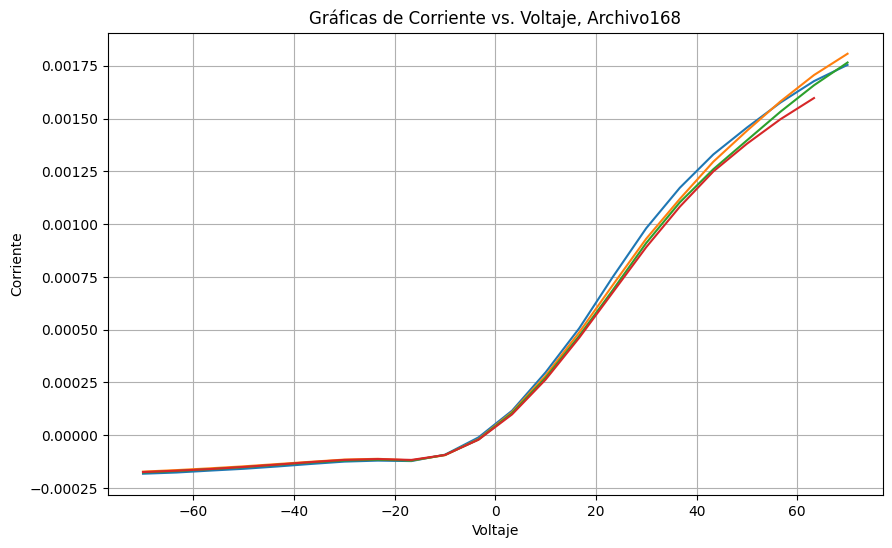

In [21]:
graf.GrafDatos(df, segmentos_df, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,168,show_legend=False)

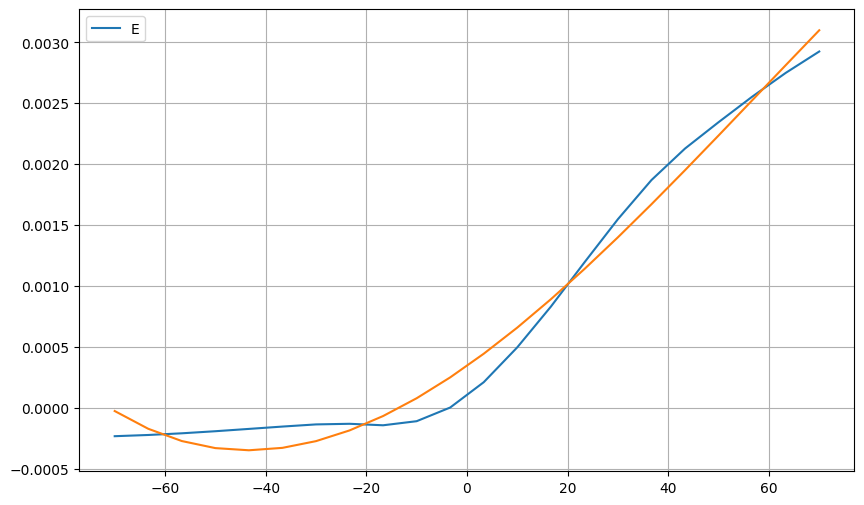

In [5]:
#### Prueba de curve_fitting ####
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

datos = segmentos_df[0]
x_values = datos["Voltaje"]
y_values = datos["Corriente"]

def objective(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

popt, _ = curve_fit(objective, x_values, y_values)

x = x_values
plt.figure(figsize=(10, 6))
plt.plot(x_values,y_values)
plt.legend("Experimental")
plt.grid(True)
plt.plot(x,popt[0]*x**3+popt[1]*x**2+popt[2]*x+popt[3])
plt.show()

In [6]:
importlib.reload(calc)
indice_menor_a, a_opt, b_opt, v_corte = calc.fit_ion_sat(segmentos_df,n_segmento=37,v_sup=0,inicio=-45)
print(indice_menor_a, a_opt, b_opt, v_corte)

IndexError: list index out of range

In [ ]:
lista_vf = calc.Calc_Vf(segmentos_df,0.01,short=True)
print(lista_vf)

[-3.334079, -3.334082, -3.334079, -3.334079, -3.334075]


In [ ]:
importlib.reload(calc)
lista_Iis = calc.Calc_Iis(segmentos_df,min_datos=5,v_sup=5,inicio=-40,short=False)
print(lista_Iis)

Segmento 1:
-30.000748
7
Corriente de saturación iónica (Iis) del segmento 1: -6.181478277336689e-05
Coeficiente de determinación (r^2) del segmento 1: 0.9910294361654021
Rango de voltaje utilizado en el segmento 1: -70.000753 - -30.000748
----------------------
Segmento 2:
-23.334075
8
Corriente de saturación iónica (Iis) del segmento 2: -6.472119669820883e-05
Coeficiente de determinación (r^2) del segmento 2: 0.9910007354212218
Rango de voltaje utilizado en el segmento 2: -70.000745 - -23.334086
----------------------
Segmento 3:
-30.000744
7
Corriente de saturación iónica (Iis) del segmento 3: -6.949539759361314e-05
Coeficiente de determinación (r^2) del segmento 3: 0.9925615677091629
Rango de voltaje utilizado en el segmento 3: -70.000745 - -30.000752
----------------------
Segmento 4:
-30.000752
6
Corriente de saturación iónica (Iis) del segmento 4: -7.135323292342257e-05
Coeficiente de determinación (r^2) del segmento 4: 0.9879945826231298
Rango de voltaje utilizado en el segment

C:\Users\pelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\pelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\pelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\pelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWa

In [ ]:
print(len(lista_Iis))
print(len(segmentos_df))

5
5


In [ ]:
lista_vp_sd = calc.Calc_Vp_SD(segmentos_df)
print(lista_vp_sd)

Resultados del segmento 1:
Voltaje del plasma (Vp): 23.332584
----------------------
Resultados del segmento 2:
Voltaje del plasma (Vp): 23.332587
----------------------
Resultados del segmento 3:
Voltaje del plasma (Vp): 23.332576
----------------------
Resultados del segmento 4:
Voltaje del plasma (Vp): 23.332576
----------------------
Resultados del segmento 5:
Voltaje del plasma (Vp): 23.332584
----------------------
[23.332584, 23.332587, 23.332576, 23.332576, 23.332584]


Segmento 1:


29.198534575343682
----------------------
Segmento 2:


29.6812689005103
----------------------
Segmento 3:


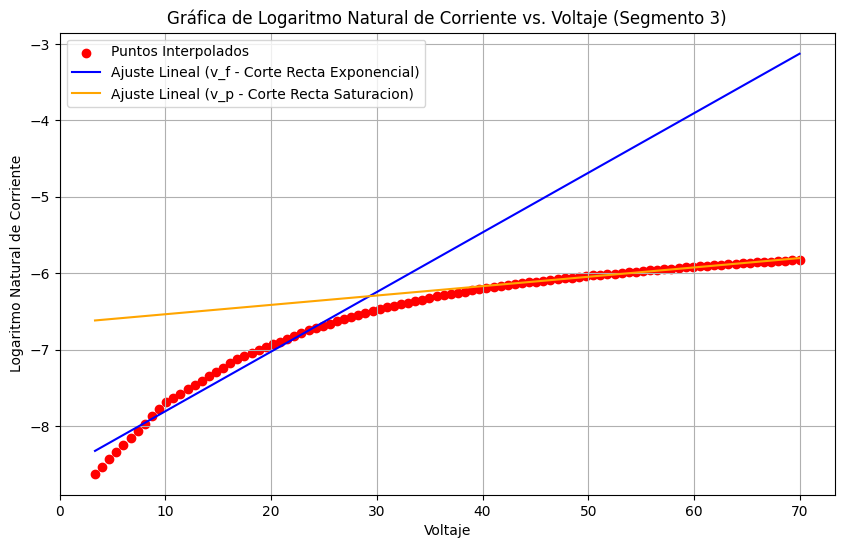

29.304833938002623
----------------------
Segmento 4:


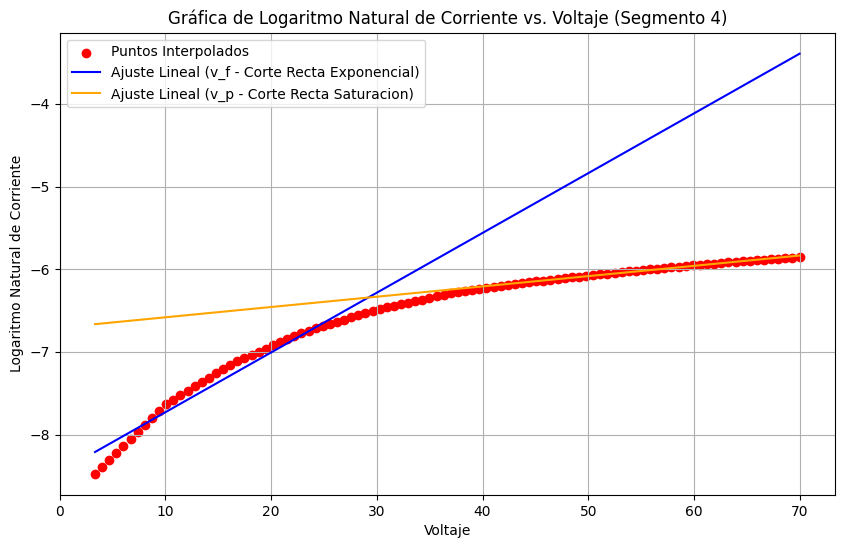

29.186671988665548
----------------------
Segmento 5:


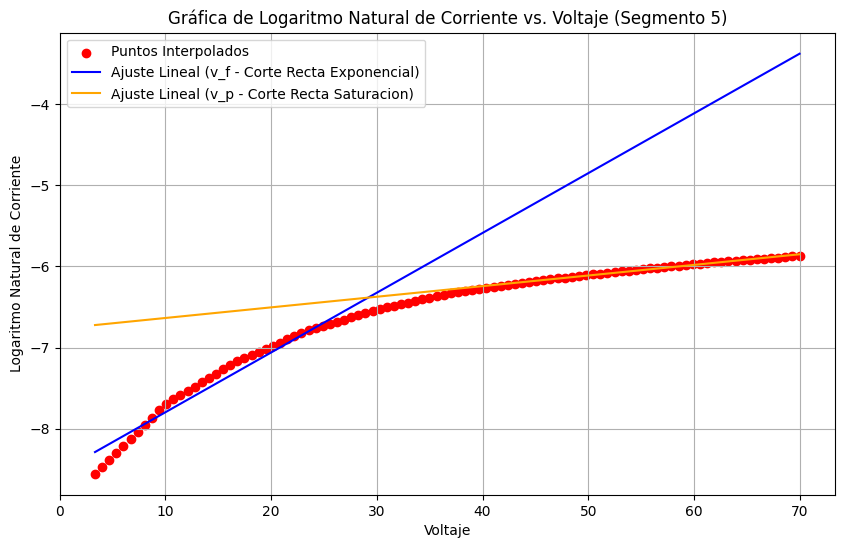

29.18061586939488
----------------------


In [ ]:
a = 30
b = 40

cortes_recta_exponencial = [a,a,a,a,a,a]
cortes_recta_saturacion = [b,b,b,b,b,b]

lista_vp_rectas = calc.Calc_Vp_Rectas(segmentos_df, lista_vf, cortes_recta_exponencial, cortes_recta_saturacion,100)


In [ ]:
lista_TeV,lista_Ies,lista_ne = calc.Calc_TeV_Ies_ne(segmentos_df, lista_vf, lista_vp_sd)
print(lista_TeV)
print(lista_Ies)
print(lista_ne)

Segmento 1:
r2 (Coeficiente de determinación): 0.9630543116928415
TeV: 11.711451545416125
ne: 1.27557E+15
Ies: 0.0011945734265734298
----------------------
Segmento 2:
r2 (Coeficiente de determinación): 0.9658892108093526
TeV: 11.774936562077478
ne: 1.30744E+15
Ies: 0.001227734265734269
----------------------
Segmento 3:
r2 (Coeficiente de determinación): 0.9614982303689239
TeV: 10.788536911165055
ne: 1.30001E+15
Ies: 0.0011685034965034995
----------------------
Segmento 4:
r2 (Coeficiente de determinación): 0.9653081455951597
TeV: 11.71634790150337
ne: 1.24872E+15
Ies: 0.00116966666666667
----------------------
Segmento 5:
r2 (Coeficiente de determinación): 0.9660042547300309
TeV: 11.508495126118937
ne: 1.20492E+15
Ies: 0.0011185874125874157
----------------------


ValueError: too many values to unpack (expected 3)

In [ ]:
lista_vp_teorico = calc.Calc_Vp_Teorico(lista_TeV,lista_vf)
print(lista_vp_teorico)

[57.18032511800611, 40.50634670845782, 60.29854166375533, 42.37030229953887, 22.96191654187892, 19.499351426452513]


In [ ]:
fileio.Comparacion_Vp(lista_vp_sd,lista_vp_rectas,lista_vp_teorico)

Vp, Método Segunda Derivada: No depende de ninguna función
67.67073
49.37795
67.67068
49.37795
26.46129
21.87795

Vp, Método Intersección de Rectas: Depende de Vf y es visual
27.28596
27.22456
27.21373
27.14022
27.54551
33.12008

Vp, Método Teórico: Depende de TeV y Vf
57.18033
40.50635
60.29854
42.37030
22.96192
19.49935


In [ ]:
lista_t = graf.Tiempos(segmentos_df)
print(lista_t)

[0.0, 0.55, 1.1, 1.6500000000000001, 2.2, 2.75]


In [ ]:
listas = ["lista_t"] + lista_t, ["lista_vf"] + lista_vf, ["lista_vp_sd"] + lista_vp_sd, ["lista_vp_rectas"] + lista_vp_rectas, ["lista_vp_teorico"] + lista_vp_teorico, ["lista_Iis"] + lista_Iis, ["lista_Ies"] + lista_Ies, ["lista_TeV"] + lista_TeV, ["lista_ne"] + lista_ne
nombre_archivo = "Archivo_518.csv"
fileio.Exportar_Resultados_CSV(nombre_archivo,listas)

FileExistsError: El archivo 'Archivo_518.csv' ya existe. Por favor, elija un nombre de archivo diferente o elimine el archivo existente.

In [ ]:
archivos_csv = ["Archivo_503.csv", "Archivo_509.csv", "Archivo_518.csv"]
n_parametro = 1  # vf=1, vp_sd=2, vp_rectas=3, vp_teorico=4, Iis=5, Ies=6, TeV=7, ne=8  

lista_tiempo, promedios_en_t = graf.Promedios_Temporales_Entre_Archivos(archivos_csv, n_parametro)

print(lista_tiempo)
print(promedios_en_t)

[0.0, 0.55, 1.1, 1.65, 2.2]
[-1.0416096666666668, -1.0416083333333332, -1.041611, -1.041612, -1.0416146666666666]


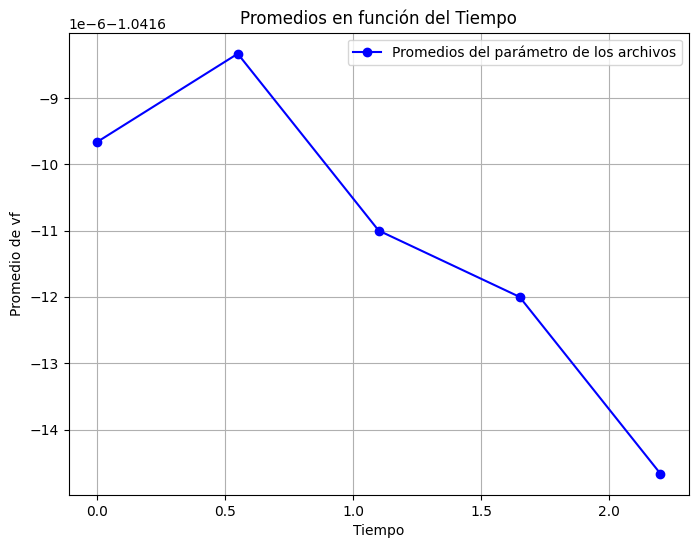

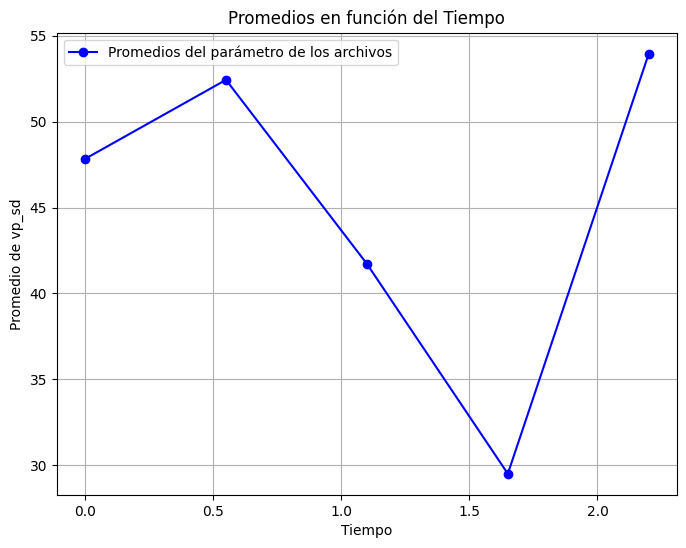

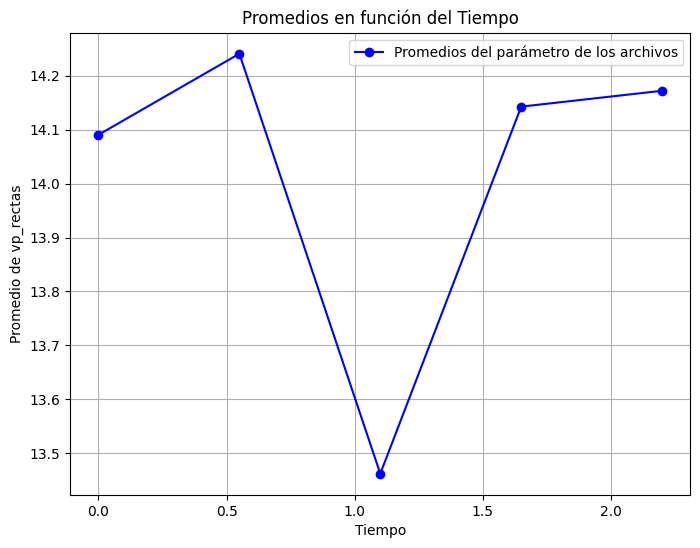

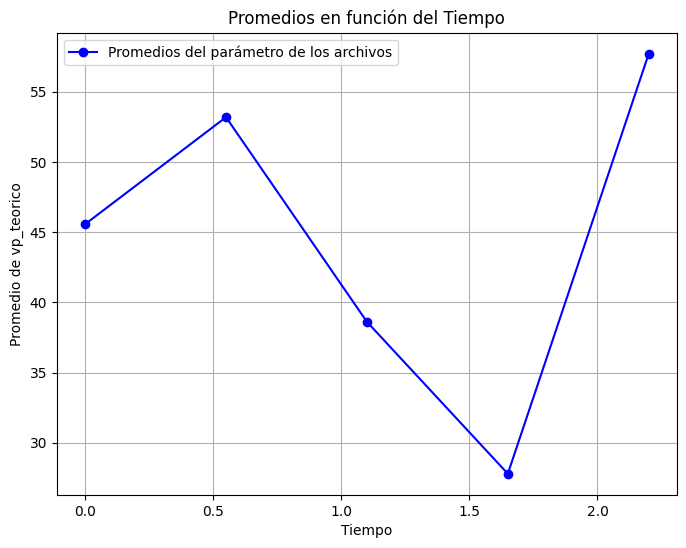

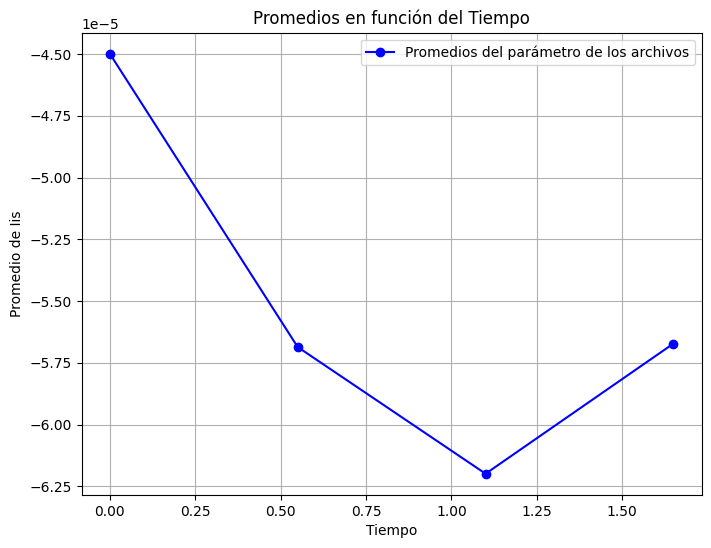

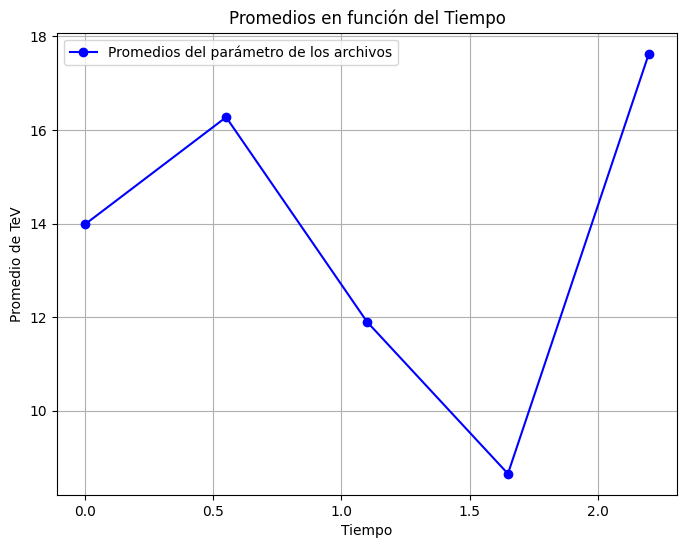

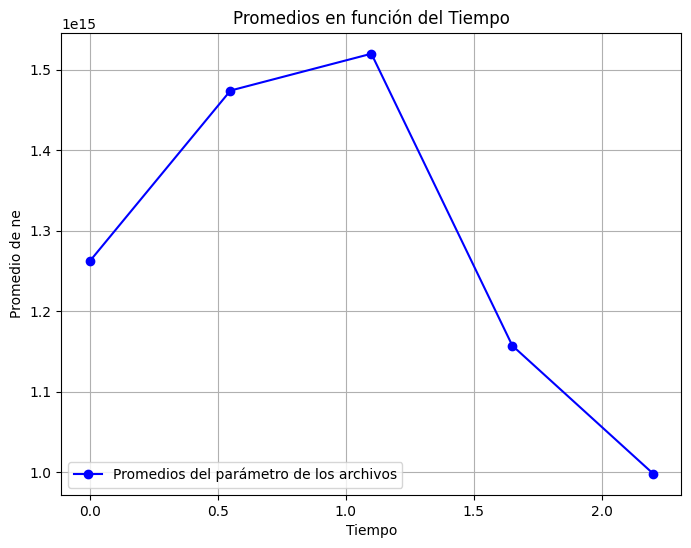

In [ ]:
archivos_csv = ["Archivo_503.csv", "Archivo_509.csv", "Archivo_518.csv"]

graf.Graf_Promedios_Temporales_Entre_Archivos(archivos_csv)

In [ ]:
lista_archivos_total = [["Archivo_113.csv","Archivo_580.csv","Archivo_581.csv"],["Archivo_503.csv","Archivo_509.csv","Archivo_518.csv"]]
tiempo, lista_promedios_posicion = graf.Promedios_Espaciales_Entre_Archivos(lista_archivos_total,1,0)
print(tiempo)
print(lista_promedios_posicion)

0.0
[2.010656, -1.0416096666666668]


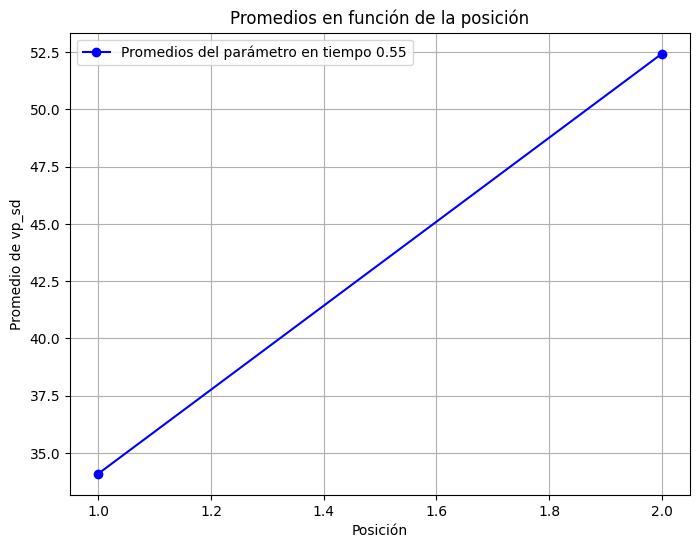

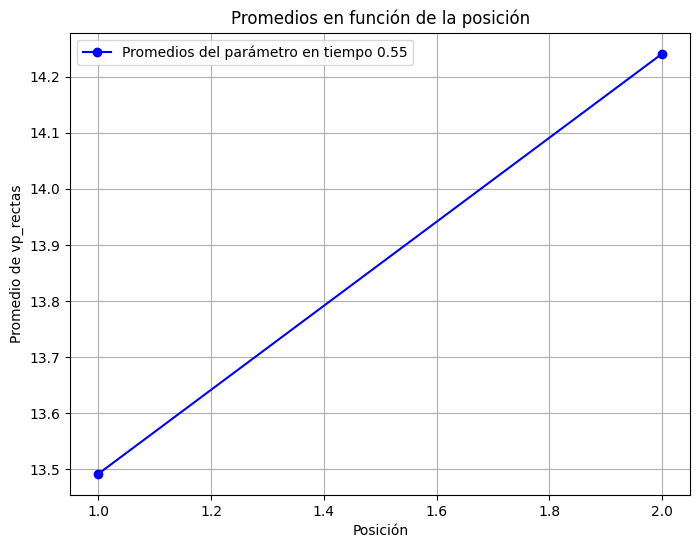

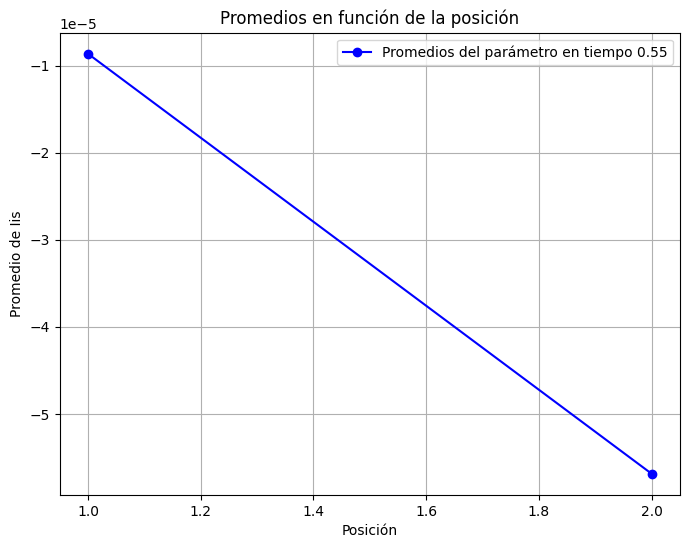

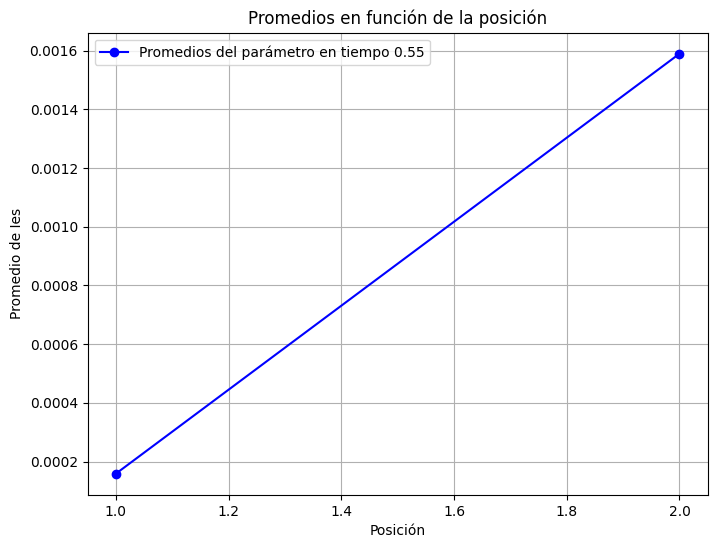

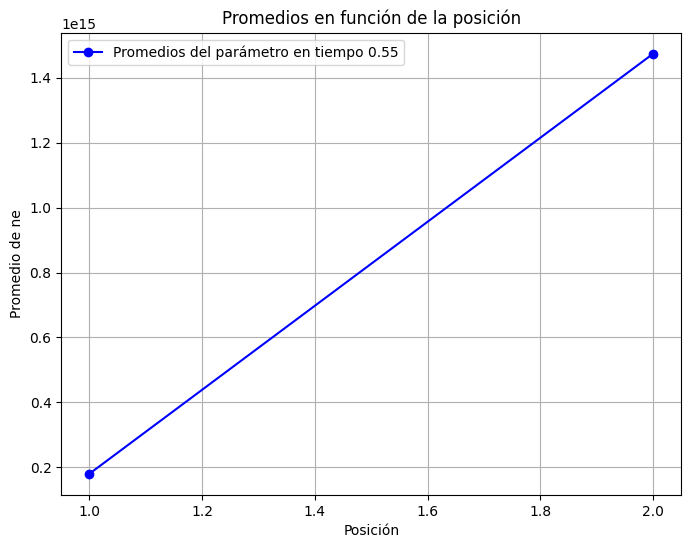

In [ ]:
archivos_csv = ["Archivo_503.csv", "Archivo_509.csv", "Archivo_518.csv"]
lista_archivos_total = [["Archivo_113.csv","Archivo_580.csv","Archivo_581.csv"],["Archivo_503.csv","Archivo_509.csv","Archivo_518.csv"]]
lista_posiciones = [1,2]
graf.Graf_Promedios_Espaciales_Entre_Archivos(archivos_csv,lista_archivos_total,lista_posiciones,1)

In [ ]:
archivos = ['Archivo_503.csv', 'Archivo_509.csv', 'Archivo_518.csv']

listas = ['lista_vf', 'lista_vp_sd', 'lista_vp_rectas', 'lista_vp_teorico', 'lista_Iis', 'lista_Ies', 'lista_TeV', 'lista_ne']

promedios = graf.Promediar_Archivos(archivos)

graf.Graf_Promedios(promedios, listas)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.